# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
# Import your libraries

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [18]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

dists

0    [46.67575812343848, 45.833610834024, 44.112424...
1    [53.78590190793384, 48.13347369132656, 48.1233...
2    [56.63591434709495, 41.1234727446669, 47.36706...
3    [53.07032480906426, 41.20260589937887, 51.9806...
4    [55.74149050874183, 54.239179470892, 46.032926...
dtype: object

In [19]:
tests = dists.apply(lambda d: stats.normaltest(d))

tests

0    (6.308894684158664, 0.042661971955425905)
1      (1.066895678203299, 0.5865790489797169)
2     (1.1587635643293888, 0.5602446127383232)
3     (0.6915118339430505, 0.7076851999743208)
4        (4.12704299166799, 0.127005930618042)
dtype: object

#### Interpret the normaltest results and make your observations.

In [ ]:
# Explain the test results here

Establecemos el nivel de confianza alpha = 0,05.
Partimos de la hipótesis nula de que la distribución es normal.

Podemos interpretar el p value de la siguiente manera:
* p <= alpha: rechazamos la hipótesis nula H0, es decir, la distribución no es normal.
* p > alpha: aceptamos la hipótesis nula, es decir, la distribución es normal.

El output de stats.normaltest son tuplas (k, p). Vemos que el valor de p del primer registro está por debajo de 0,05 y el resto están por encima. Por tanto, la primera no es normal y las otras cuatro sí lo son.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

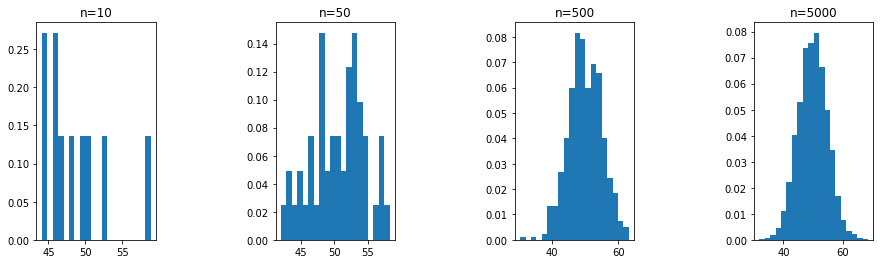

In [20]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here

El Teorema del Límite Central indica que, en condiciones muy generales, si Sn es la suma de n variables aleatorias independientes y de varianza no nula pero finita, entonces la función de distribución de Sn «se aproxima bien» a una distribución normal (también llamada distribución gaussiana). Así pues, el teorema asegura que esto ocurre cuando la suma de estas variables aleatorias e independientes es lo suficientemente grande.

Por tanto, tal y como indica el teorema, se puede observar que la distribución de aproxima a una distribució normal cuanto más grande sea el tamaño de la muestra y cuando este es lo suficientemente grande. O dicho de otra forma, cuanto mayor es el tamaño muestral (n), menos diferencia hay entre la distribución de las medias muestrales y una distribución normal.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

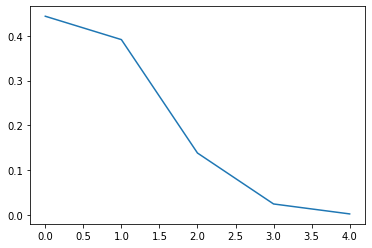

In [4]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here

Se calcula la función de masas de probabilidad (pmf) porque es la forma de representar u obtener un valor de probabilidad de una distribución discreta.

El resultado es una distribución binomial, una distribución de probabilidad discreta. La probabilidad de éxito (clicar en el anuncio) es 0,15 y el tamaño de la muestra es 5 (5 personas).

Como p = 0,15, la distribución no es normal, sino right skewed.

#### Now plot PMP with 50, 500, and 5000 visitors.

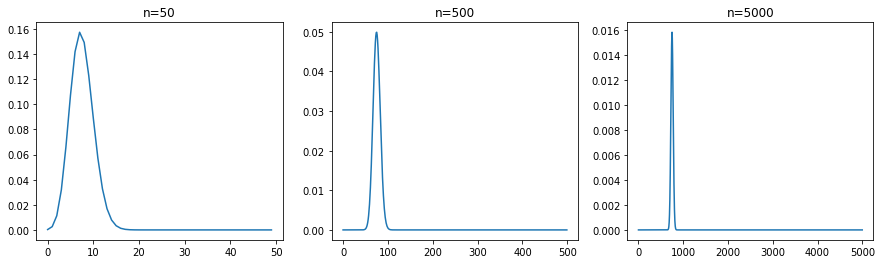

In [5]:
# Your code here

sample_size = [50, 500, 5000]
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(15)

for i in range(0, 3):
    n, p = sample_size[i], 0.15
    x = range(n)
    dist = binom(n,p)
    ax[i].set_title('n=%s' % (sample_size[i]))
    ax[i].plot(x,dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here

Vemos que la distribución binomial se puede aproximar mediante una distribución normal:

B(n,p) -> N(m, desv. típica)
En las 3 gráficas obtenidas, la media es 7,5, 75 y 750, respectivamente.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

La distribución de Poisson es una distribución de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos "raros".

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [9]:
# Your code here
from scipy.stats import poisson
poisson.pmf(k=320, mu=300, loc=0)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [10]:
# Your code here
poisson.pmf(k=60, mu=300, loc=0)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

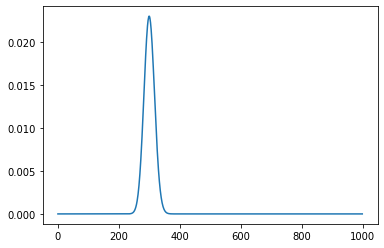

In [12]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)